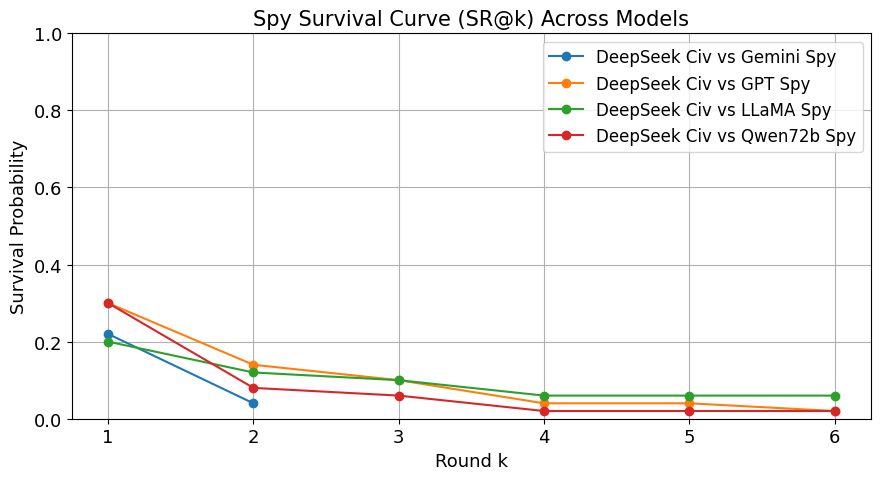

In [18]:
import os
import json
import matplotlib.pyplot as plt

# 需要绘图的多个目录（别忘了真实路径）
log_dirs = {
    "DeepSeek Civ vs Gemini Spy": "results/civ_deepseek_spy_gemini",
    "DeepSeek Civ vs GPT Spy": "results/civ_deepseek_spy_gpt_merged",
    "DeepSeek Civ vs LLaMA Spy": "results/civ_deepseek_spy_llama",
    "DeepSeek Civ vs Qwen72b Spy": "results/civ_deepseek_spy_qwen72b",
}

def compute_sr_curve(log_dir):
    """读取一个目录并返回 SR@k 曲线数据 (k_list, sr_list)"""
    spy_survival = {}

    for fname in os.listdir(log_dir):
        if not (fname.startswith("game_log_") and fname.endswith(".json")):
            continue

        path = os.path.join(log_dir, fname)

        try:
            with open(path, "r", encoding="utf-8") as f:
                data = json.load(f)

            game_id = data["metadata"]["game_id"]
            public_log = data.get("public_log", [])

            spy_alive_round = 0

            for entry in public_log:
                if entry.get("phase") == "vote_result":
                    r = entry.get("round_num")
                    content = entry.get("content", "")
                    eliminated_role = entry.get("eliminated_player_role")

                    # 如果卧底还活着
                    if "spy is still alive" in content or eliminated_role != "spy":
                        spy_alive_round = max(spy_alive_round, r)
                    else:
                        break
            
            spy_survival[game_id] = spy_alive_round

        except Exception as e:
            print(f"Error in {fname}: {e}")

    if not spy_survival:
        return [], []

    total_games = len(spy_survival)
    max_k = max(spy_survival.values())
    k_list = list(range(1, max_k + 1))
    sr_curve = []

    for k in k_list:
        alive = sum(1 for r in spy_survival.values() if r >= k)
        sr_curve.append(alive / total_games)

    return k_list, sr_curve


# ---------- 画多个模型的 SR@k ----------
plt.figure(figsize=(9, 5))

for label, path in log_dirs.items():
    k_list, sr_curve = compute_sr_curve(path)

    if not k_list:
        print(f"[Warning] Directory empty or invalid: {path}")
        continue

    plt.plot(k_list, sr_curve, marker="o", label=label)

plt.title("Spy Survival Curve (SR@k) Across Models")
plt.xlabel("Round k")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


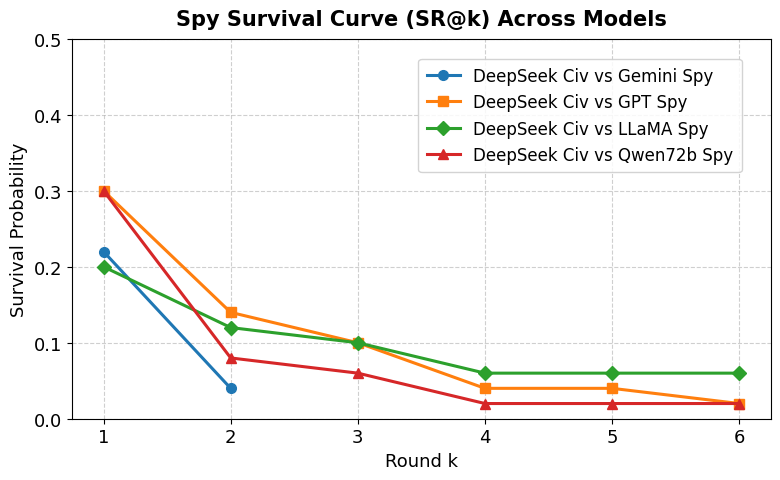

In [19]:
import os
import json
import matplotlib.pyplot as plt

# 需要绘图的多个目录（别忘了真实路径）
log_dirs = {
    "DeepSeek Civ vs Gemini Spy": "results/civ_deepseek_spy_gemini",
    "DeepSeek Civ vs GPT Spy": "results/civ_deepseek_spy_gpt_merged",
    "DeepSeek Civ vs LLaMA Spy": "results/civ_deepseek_spy_llama",
    "DeepSeek Civ vs Qwen72b Spy": "results/civ_deepseek_spy_qwen72b",
}

def compute_sr_curve(log_dir):
    """读取一个目录并返回 SR@k 曲线数据 (k_list, sr_list)"""
    spy_survival = {}

    for fname in os.listdir(log_dir):
        if not (fname.startswith("game_log_") and fname.endswith(".json")):
            continue

        path = os.path.join(log_dir, fname)

        try:
            with open(path, "r", encoding="utf-8") as f:
                data = json.load(f)

            game_id = data["metadata"]["game_id"]
            public_log = data.get("public_log", [])

            spy_alive_round = 0

            for entry in public_log:
                if entry.get("phase") == "vote_result":
                    r = entry.get("round_num")
                    content = entry.get("content", "")
                    eliminated_role = entry.get("eliminated_player_role")

                    # 如果卧底还活着
                    if "spy is still alive" in content or eliminated_role != "spy":
                        spy_alive_round = max(spy_alive_round, r)
                    else:
                        break
            
            spy_survival[game_id] = spy_alive_round

        except Exception as e:
            print(f"Error in {fname}: {e}")

    if not spy_survival:
        return [], []

    total_games = len(spy_survival)
    max_k = max(spy_survival.values())
    k_list = list(range(1, max_k + 1))
    sr_curve = []

    for k in k_list:
        alive = sum(1 for r in spy_survival.values() if r >= k)
        sr_curve.append(alive / total_games)

    return k_list, sr_curve


# ---------------- 美化设置 ----------------
plt.figure(figsize=(8, 5))

# 更美观的字体与字号
plt.rcParams.update({
    "font.size": 13,
    "font.family": "sans-serif",
    "axes.titlesize": 15,
    "axes.labelsize": 13,
    "legend.fontsize": 12,
})

# 好看的颜色与 marker
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
markers = ["o", "s", "D", "^"]

for (label, path), c, m in zip(log_dirs.items(), colors, markers):
    k_list, sr_curve = compute_sr_curve(path)

    if not k_list:
        print(f"[Warning] Directory empty or invalid: {path}")
        continue

    plt.plot(
        k_list,
        sr_curve,
        marker=m,
        markersize=7,
        linewidth=2.2,
        color=c,
        label=label,
    )

# ---------------- 美化坐标轴与网格 ----------------
plt.title("Spy Survival Curve (SR@k) Across Models", fontweight="bold", pad=10)
plt.xlabel("Round k")
plt.ylabel("Survival Probability")

plt.grid(
    True,
    linestyle="--",
    linewidth=0.8,
    alpha=0.6,
)

plt.ylim(0, 0.5)


plt.legend(
    loc="upper right",
    bbox_to_anchor=(0.97, 0.97),
    frameon=True,
    fancybox=True,
    framealpha=0.85,   # 轻微透明，不遮挡线
    borderpad=0.5,
)


plt.tight_layout()
plt.show()


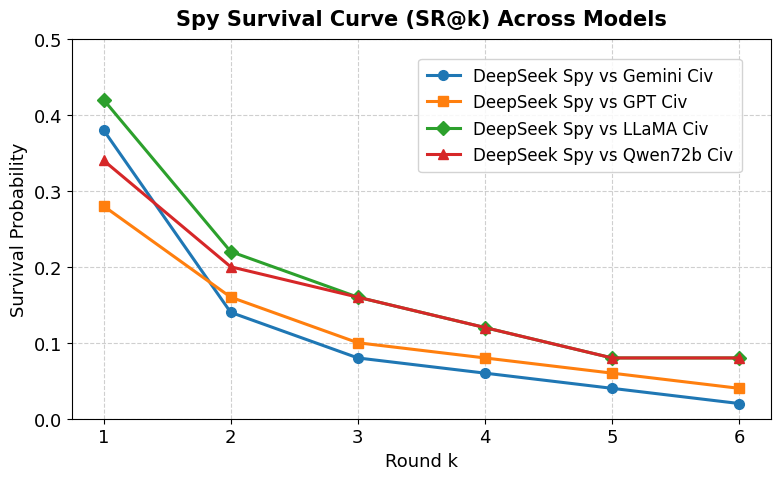

In [20]:
import os
import json
import matplotlib.pyplot as plt

# 需要绘图的多个目录（别忘了真实路径）
log_dirs = {
    "DeepSeek Spy vs Gemini Civ": "results/civ_gemini_spy_deepseek",
    "DeepSeek Spy vs GPT Civ": "results/civ_gpt_spy_deepseek_merged",
    "DeepSeek Spy vs LLaMA Civ": "results/civ_llama_spy_deepseek",
    "DeepSeek Spy vs Qwen72b Civ": "results/civ_qwen72b_spy_deepseek",
}

def compute_sr_curve(log_dir):
    """读取一个目录并返回 SR@k 曲线数据 (k_list, sr_list)"""
    spy_survival = {}

    for fname in os.listdir(log_dir):
        if not (fname.startswith("game_log_") and fname.endswith(".json")):
            continue

        path = os.path.join(log_dir, fname)

        try:
            with open(path, "r", encoding="utf-8") as f:
                data = json.load(f)

            game_id = data["metadata"]["game_id"]
            public_log = data.get("public_log", [])

            spy_alive_round = 0

            for entry in public_log:
                if entry.get("phase") == "vote_result":
                    r = entry.get("round_num")
                    content = entry.get("content", "")
                    eliminated_role = entry.get("eliminated_player_role")

                    # 如果卧底还活着
                    if "spy is still alive" in content or eliminated_role != "spy":
                        spy_alive_round = max(spy_alive_round, r)
                    else:
                        break
            
            spy_survival[game_id] = spy_alive_round

        except Exception as e:
            print(f"Error in {fname}: {e}")

    if not spy_survival:
        return [], []

    total_games = len(spy_survival)
    max_k = max(spy_survival.values())
    k_list = list(range(1, max_k + 1))
    sr_curve = []

    for k in k_list:
        alive = sum(1 for r in spy_survival.values() if r >= k)
        sr_curve.append(alive / total_games)

    return k_list, sr_curve


# ---------------- 美化设置 ----------------
plt.figure(figsize=(8, 5))

# 更美观的字体与字号
plt.rcParams.update({
    "font.size": 13,
    "font.family": "sans-serif",
    "axes.titlesize": 15,
    "axes.labelsize": 13,
    "legend.fontsize": 12,
})

# 好看的颜色与 marker
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
markers = ["o", "s", "D", "^"]

for (label, path), c, m in zip(log_dirs.items(), colors, markers):
    k_list, sr_curve = compute_sr_curve(path)

    if not k_list:
        print(f"[Warning] Directory empty or invalid: {path}")
        continue

    plt.plot(
        k_list,
        sr_curve,
        marker=m,
        markersize=7,
        linewidth=2.2,
        color=c,
        label=label,
    )

# ---------------- 美化坐标轴与网格 ----------------
plt.title("Spy Survival Curve (SR@k) Across Models", fontweight="bold", pad=10)
plt.xlabel("Round k")
plt.ylabel("Survival Probability")

plt.grid(
    True,
    linestyle="--",
    linewidth=0.8,
    alpha=0.6,
)

plt.ylim(0, 0.5)


# 图例移动到右边、不遮挡图形
plt.legend(
    loc="upper right",
    bbox_to_anchor=(0.97, 0.97),
    frameon=True,
    fancybox=True,
    framealpha=0.85,   # 轻微透明，不遮挡线
    borderpad=0.5,
)


plt.tight_layout()
plt.show()


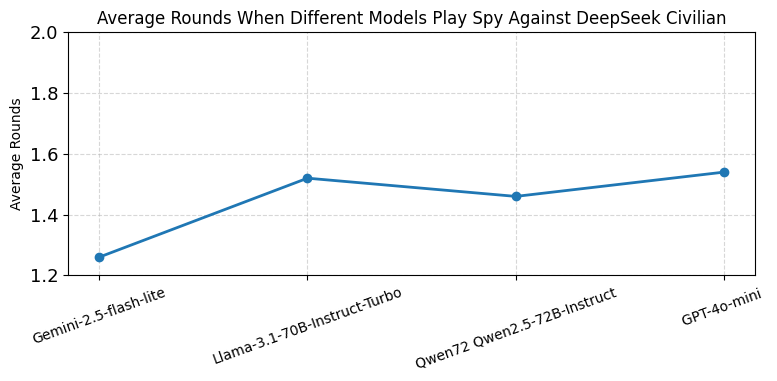

In [34]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# 新横轴名称（与你的 log_dirs 一致）
models = [
    "Gemini-2.5-flash-lite",
    "Llama-3.1-70B-Instruct-Turbo",
    "Qwen72 Qwen2.5-72B-Instruct",
    "GPT-4o-mini "
]

# 四组对应的平均轮数
rounds = [1.26, 1.52, 1.46, 1.54]

# 画图
plt.figure(figsize=(8,4))
plt.plot(models, rounds, marker='o', linewidth=2)

plt.title("Average Rounds When Different Models Play Spy Against DeepSeek Civilian",
          fontsize=12)

# plt.xlabel("Experiment Setting")
plt.ylabel("Average Rounds",fontsize=10)

plt.ylim(1.2, 2.0)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=20, fontsize=10)
plt.tight_layout()
plt.show()



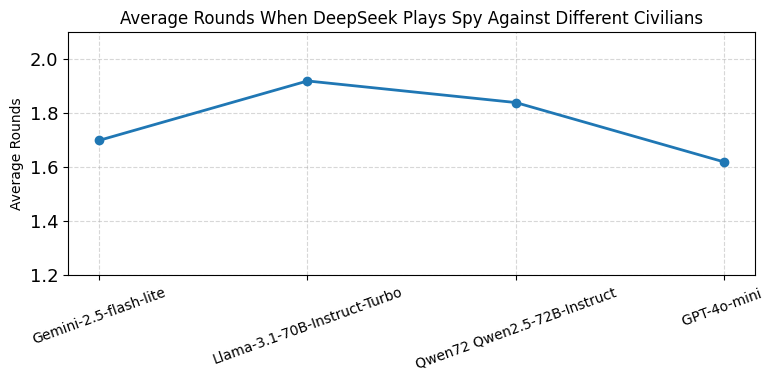

In [35]:
import matplotlib.pyplot as plt

# 平民模型（横轴，对应你使用的命名）
models = [
    "Gemini-2.5-flash-lite",
    "Llama-3.1-70B-Instruct-Turbo",
    "Qwen72 Qwen2.5-72B-Instruct",
    "GPT-4o-mini "
]

# DeepSeek 当卧底时对应的平均轮数（按相同顺序排列）
rounds = [
    1.70,  # Gemini
    1.92,  # LLaMA
    1.84,  # Qwen72
    1.62   # GPT-4o-mini
]

# 作图
plt.figure(figsize=(8,4))
plt.plot(models, rounds, marker='o', linewidth=2)

plt.title("Average Rounds When DeepSeek Plays Spy Against Different Civilians",
          fontsize=12)

plt.ylabel("Average Rounds", fontsize=10)

plt.ylim(1.2, 2.1)
plt.grid(True, linestyle="--", alpha=0.5)

plt.xticks(rotation=20, fontsize=10)

plt.tight_layout()
plt.show()


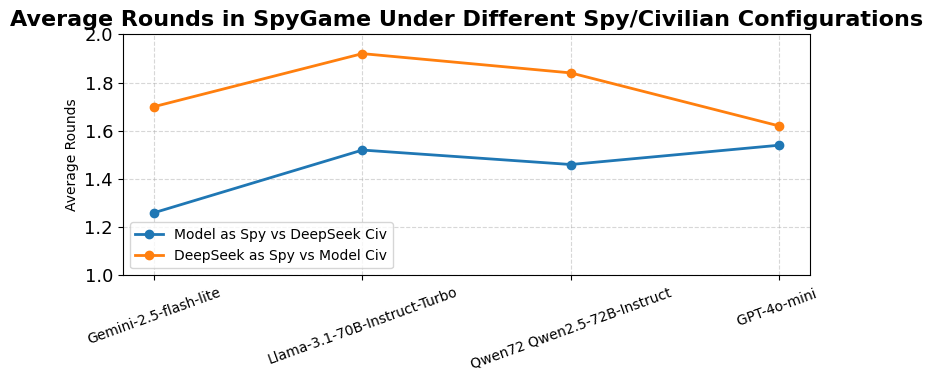

In [41]:
import matplotlib.pyplot as plt

# 横轴：四个模型
models = [
    "Gemini-2.5-flash-lite",
    "Llama-3.1-70B-Instruct-Turbo",
    "Qwen72 Qwen2.5-72B-Instruct",
    "GPT-4o-mini "
]

# 卧底 = 上一图（不同模型 Spy 对 DeepSeek 平民）
spy_rounds = [1.26, 1.52, 1.46, 1.54]

# DeepSeek 是卧底，这些模型是平民
deepseek_spy_rounds = [1.70, 1.92, 1.84, 1.62]

plt.figure(figsize=(8,4))

# 第一条线：不同模型当卧底
plt.plot(models, spy_rounds, marker='o', linewidth=2, label="Model as Spy vs DeepSeek Civ")

# 第二条线：DeepSeek 当卧底
plt.plot(models, deepseek_spy_rounds, marker='o', linewidth=2, label="DeepSeek as Spy vs Model Civ")

# 标题 & 轴标签
plt.title("Average Rounds in SpyGame Under Different Spy/Civilian Configurations",
          fontsize=16, weight='bold')

plt.ylabel("Average Rounds", fontsize=10)
plt.ylim(1.0, 2)
plt.grid(True, linestyle="--", alpha=0.5)

plt.xticks(rotation=20, fontsize=10)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


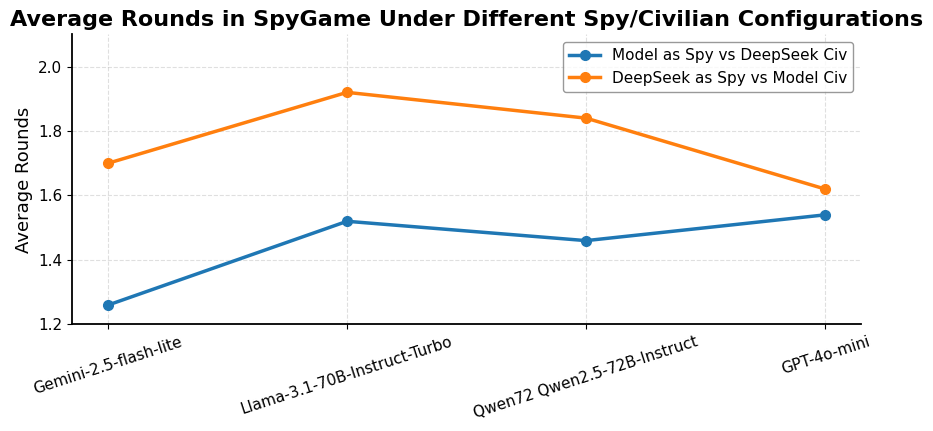

In [38]:
import matplotlib.pyplot as plt

# 横轴四个模型
models = [
    "Gemini-2.5-flash-lite",
    "Llama-3.1-70B-Instruct-Turbo",
    "Qwen72 Qwen2.5-72B-Instruct",
    "GPT-4o-mini"
]

# 两条曲线数据
spy_rounds = [1.26, 1.52, 1.46, 1.54]        # Model as Spy vs DeepSeek Civ
deepseek_spy_rounds = [1.70, 1.92, 1.84, 1.62]  # DeepSeek as Spy vs Model Civ

plt.figure(figsize=(9,4.5))

# 使用颜色盲友好的配色方案
colors = ["#1f77b4", "#ff7f0e"]  # 蓝 & 橙

# 绘制两条折线
plt.plot(models, spy_rounds, 
         marker='o', linewidth=2.5, markersize=7,
         color=colors[0], label="Model as Spy vs DeepSeek Civ")

plt.plot(models, deepseek_spy_rounds, 
         marker='o', linewidth=2.5, markersize=7,
         color=colors[1], label="DeepSeek as Spy vs Model Civ")

# 标题 & 轴标签
plt.title("Average Rounds in SpyGame Under Different Spy/Civilian Configurations",
          fontsize=16, weight='bold')

plt.ylabel("Average Rounds", fontsize=13)

# 坐标轴刻度
plt.xticks(rotation=18, fontsize=11)
plt.yticks(fontsize=11)

# 网格虚线
plt.grid(True, linestyle="--", alpha=0.4)

# 坐标轴加粗
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.3)
plt.gca().spines['bottom'].set_linewidth(1.3)

# y 轴范围
plt.ylim(1.2, 2.1)

# 美化 legend
plt.legend(fontsize=11, frameon=True, edgecolor="gray", fancybox=True)

plt.tight_layout()
plt.show()
